# 3-3. 냉장고가 아이스크림을 자동으로 주문해 준다면
## 02. 데이터 불러오기

In [1]:
import csv
f = open('temp_ice.csv', encoding='euc-kr') # 어느 폴더에 있는 지 확인
data = csv.reader(f)
header = next(data)
temp = []
ice = []

In [2]:
for row in data:
    temp.append(float(row[1]))
    ice.append(int(row[4]))

print(temp)
print(ice)

[-2.1, -2.5, -2.1, -0.7, 0.2, -1.3, -0.5, -0.7, -2.9, 0.5, 2.1, 3.0, 1.3, 1.0, 0.9, -3.2, 0.4, 0.8, 2.9, 1.6, 0.5, 2.6, 3.1, 0.7, -0.4, -1.8, -0.2, 2.6, 0.0, 3.5, 0.3, -1.3, 2.1, 5.6, 2.5, 2.9, 5.6, 2.1, -2.0, -1.7, -1.4, -0.8, 0.1, 0.3, 0.6, 2.0, -0.3, -0.2, 2.2, 2.9, 2.8, 2.7, 3.9, 5.0, 6.1, 6.0, 5.4, 7.1, 6.8, 6.0, 6.9, 8.7, 8.8, 8.2, 8.8, 6.5, 6.1, 7.9, 7.8, 6.4, 5.8, 3.9, 5.2, 5.8, 5.8, 6.6, 7.5, 10.7, 11.4, 9.8, 5.2, 4.2, 4.7, 7.2, 10.5, 12.8, 10.6, 10.6, 7.2, 5.4, 5.7, 6.7, 7.4, 9.9, 11.7, 11.6, 12.5, 11.8, 9.3, 7.2, 8.8, 10.7, 11.6, 10.2, 11.1, 14.2, 15.5, 15.3, 12.8, 14.7, 16.5, 17.6, 16.8, 17.3, 13.5, 9.4, 11.4, 12.1, 11.3, 14.6, 15.4, 16.0, 16.7, 17.6, 18.9, 14.0, 13.9, 15.7, 17.1, 17.6, 18.5, 18.4, 17.9, 19.8, 20.3, 21.4, 21.3, 18.8, 19.5, 17.0, 17.0, 19.2, 20.9, 22.9, 23.3, 23.2, 18.6, 17.8, 19.7, 20.5, 18.6, 18.9, 20.6, 22.0, 23.1, 22.9, 21.1, 18.6, 20.1, 19.7, 18.3, 18.8, 19.7, 21.2, 20.2, 20.4, 20.2, 21.3, 21.3, 22.2, 23.4, 22.8, 21.7, 21.6, 22.5, 23.6, 21.1, 23.8, 23.6

## 03. 데이터 다루기

In [3]:
print(min(temp), max(temp))

-3.8 28.8


In [5]:
import numpy as np

bins = np.arange(min(temp), max(temp)+5, 5)
print(bins)

[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


In [6]:
hist, bins = np.histogram(temp, bins)
print(hist)
print(bins)

[40 63 50 49 57 80 26]
[-3.8  1.2  6.2 11.2 16.2 21.2 26.2 31.2]


In [7]:
ice_buy = np.zeros(7)

for i in range(0, len(temp)):
    for j in range(0, len(bins)):
        if j == len(bins):
            ice_buy[j] = ice_buy[j] + ice[i]
        else:
            if bins[j] <= temp[i] and temp[i] < bins[j+1]:
                ice_buy[j] = ice_buy[j] + ice[i]

print(ice_buy)

[1098. 1782. 1469. 1632. 3198. 4337. 1616.]


In [8]:
ice_buy_a = np.zeros(7)

for i in range(0, len(ice_buy)):
    ice_buy_a[i] = ice_buy[i]/hist[i]

for i in range(0, len(ice_buy)):
    print('%0.2f' % ice_buy_a[i])

27.45
28.29
29.38
33.31
56.11
54.21
62.15


## 04. 데이터 시각화하기

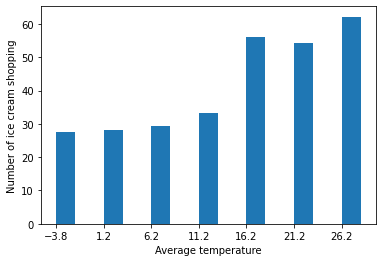

In [9]:
import matplotlib.pyplot as plt
plt.xlabel('Average temperature')
plt.ylabel('Number of ice cream shopping')

# bar graph
plt.bar(bins[0:7], ice_buy_a, width=2, align='edge')
plt.xticks(bins[0:7])
plt.show()

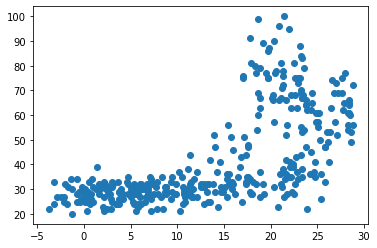

In [10]:
# scatter plot
plt.scatter(temp, ice)
plt.show()